## Minimum discernable reflectivty of CPOL

In [69]:
import pyart
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline
import math

## Load radar data and grid (no filter)

(-150, 150)

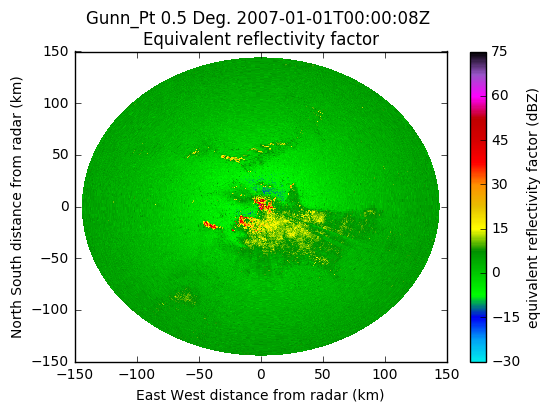

In [41]:
radar_file = '/home/rjackson/data/radar/Gunn_pt_20070101000000ppi.nc'

Radar = pyart.io.read(radar_file)
display = pyart.graph.RadarMapDisplay(Radar)
display.plot_ppi('reflectivity', 0)
plt.xlim([-150, 150])
plt.ylim([-150, 150])


In [152]:
def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000), bsp=1.0, 
               min_radius=750, h_factor=4.0, nb=1.5,
               fields=['DT', 'VT'], origin=None, gatefilter=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        weighting_function='Cressman',
        gridding_algo='map_gates_to_grid',
        h_factor=h_factor,
        min_radius=min_radius,
        bsp=bsp,
        nb=nb,
        gatefilter=gatefilter)
    print(time.time() - bt, 'seconds to grid radar')
    return grid

In [132]:
Grid = grid_radar(Radar, 
                  origin=(Radar.latitude['data'][0], Radar.longitude['data'][0]),
                  xlim=(-150000, 150000), ylim=(-150000, 150000), 
                  fields=['reflectivity'], min_radius=500.0, bsp=1.0, nb=1.5,
                  h_factor=2.0,
                  zlim=(500, 20000), grid_shape=(40, 121, 121))

0.9954931735992432 seconds to grid radar


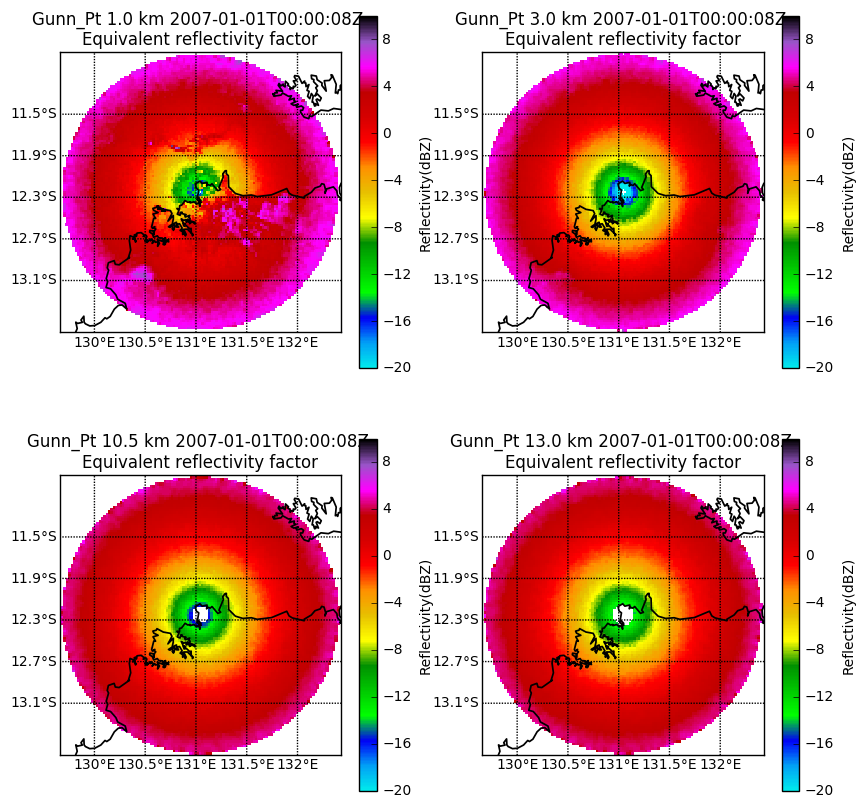

In [133]:
plt.figure(figsize=(10,10))
plt.subplot(221)
CPOLGridDisplay = pyart.graph.GridMapDisplay(Grid)
CPOLGridDisplay.plot_basemap(min_lat=-13.0, max_lat=-11.8,
                             min_lon=130.3, max_lon=131.7,
                             lat_lines=[-13.1, -12.7, -12.3, -11.9, -11.5],
                             lon_lines=[130.0, 130.5, 131.0, 131.5, 132.0],
                             resolution='i')
CPOLGridDisplay.plot_grid('reflectivity', 1, vmin=-20, vmax=10,
                          cmap=pyart.graph.cm.NWSRef)
plt.subplot(222)
CPOLGridDisplay = pyart.graph.GridMapDisplay(Grid)
CPOLGridDisplay.plot_basemap(min_lat=-13.0, max_lat=-11.8,
                             min_lon=130.3, max_lon=131.7,
                             lat_lines=[-13.1, -12.7, -12.3, -11.9, -11.5],
                             lon_lines=[130.0, 130.5, 131.0, 131.5, 132.0],
                             resolution='i')
CPOLGridDisplay.plot_grid('reflectivity', 5, vmin=-20, vmax=10,
                          cmap=pyart.graph.cm.NWSRef)
plt.subplot(223)
CPOLGridDisplay = pyart.graph.GridMapDisplay(Grid)
CPOLGridDisplay.plot_basemap(min_lat=-13.0, max_lat=-11.8,
                             min_lon=130.3, max_lon=131.7,
                             lat_lines=[-13.1, -12.7, -12.3, -11.9, -11.5],
                             lon_lines=[130.0, 130.5, 131.0, 131.5, 132.0],
                             resolution='i')
CPOLGridDisplay.plot_grid('reflectivity', 20, vmin=-20, vmax=10,
                          cmap=pyart.graph.cm.NWSRef)
plt.subplot(224)
CPOLGridDisplay = pyart.graph.GridMapDisplay(Grid)
CPOLGridDisplay.plot_basemap(min_lat=-13.0, max_lat=-11.8,
                             min_lon=130.3, max_lon=131.7,
                             lat_lines=[-13.1, -12.7, -12.3, -11.9, -11.5],
                             lon_lines=[130.0, 130.5, 131.0, 131.5, 132.0],
                             resolution='i')
CPOLGridDisplay.plot_grid('reflectivity', 25, vmin=-20, vmax=10,
                          cmap=pyart.graph.cm.NWSRef)

## Calculate reflectivity vs. distance from radar

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


/home/rjackson/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


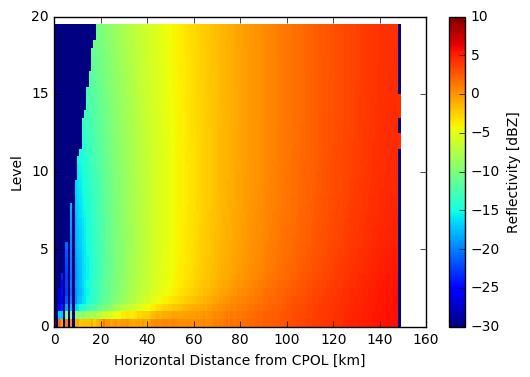

In [138]:
x = Grid.point_x['data']
y = Grid.point_y['data']
dist_from_center = np.sqrt(np.square(x)+np.square(y))/1e3
dist_bins = np.arange(0, 150, 1)
reflectivity = np.nan*np.ones((40, len(dist_bins)))
std = np.nan*np.ones((40, len(dist_bins)))
for levels in range(0, 40):
    for i in range(0, len(dist_bins)-1):
        which = np.where(np.logical_and(dist_from_center[levels] >= dist_bins[i],
                                        dist_from_center[levels] < dist_bins[i+1]))
        reflectivity[levels,i] = np.ma.mean(Grid.fields['reflectivity']['data'][levels][which])
        std[levels,i] = np.ma.std(Grid.fields['reflectivity']['data'][levels][which])
dist_bins_grid, z_grid = np.meshgrid(dist_bins, np.arange(0,20,0.5))
plt.pcolormesh(dist_bins_grid, z_grid, reflectivity, vmin=-30, vmax=10)
ax = plt.colorbar()
ax.set_label('Reflectivity [dBZ]')
plt.xlabel('Horizontal Distance from CPOL [km]')
plt.ylabel('Level')

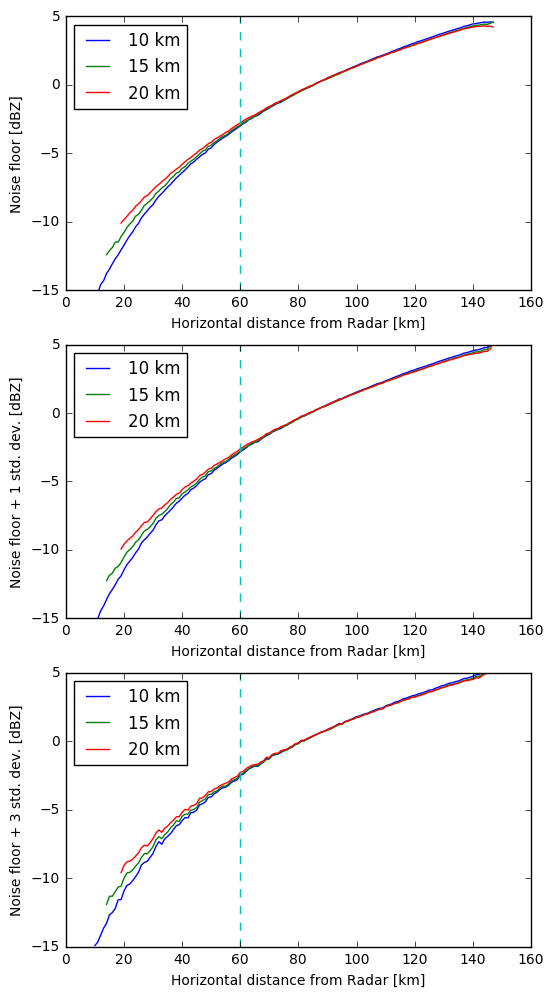

In [151]:
plt.figure(figsize=(6,12))
plt.subplot(311)
plt.plot(dist_bins_grid[20], reflectivity[20])
plt.plot(dist_bins_grid[30], reflectivity[30])
plt.plot(dist_bins_grid[39], reflectivity[39])
plt.plot([60,60], [-15,5], linestyle='--')
plt.legend(['10 km', '15 km', '20 km'], loc='best')
plt.ylim([-15, 5])
plt.xlabel('Horizontal distance from Radar [km]')
plt.ylabel('Noise floor [dBZ]')

plt.subplot(312)
plt.plot(dist_bins_grid[20], reflectivity[20]+std[20])
plt.plot(dist_bins_grid[30], reflectivity[30]+std[20])
plt.plot(dist_bins_grid[39], reflectivity[39]+std[20])
plt.plot([60,60], [-15,5], linestyle='--')
plt.legend(['10 km', '15 km', '20 km'], loc='best')
plt.ylim([-15, 5])
plt.xlabel('Horizontal distance from Radar [km]')
plt.ylabel('Noise floor + 1 std. dev. [dBZ]')

plt.subplot(313)
plt.plot(dist_bins_grid[20], reflectivity[20]+3*std[20])
plt.plot(dist_bins_grid[30], reflectivity[30]+3*std[20])
plt.plot(dist_bins_grid[39], reflectivity[39]+3*std[20])
plt.plot([60,60], [-15,5], linestyle='--')
plt.legend(['10 km', '15 km', '20 km'], loc='best')
plt.ylim([-15, 5])
plt.xlabel('Horizontal distance from Radar [km]')
plt.ylabel('Noise floor + 3 std. dev. [dBZ]')